In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# 가변형 변수 만들기

여러개의 범주형 자료 -> 가변수 생성

In [5]:
df = pd.DataFrame(
    {"m_id" : [1, 2, 3, 4, 5],
     "m_gen" : ["rock", "rock", "pop", "disco", "pop"]},
    columns = ["m_id", "m_gen"]
)
df

,m_id,m_gen
0,1,rock
1,2,rock
2,3,pop
3,4,disco
4,5,pop


In [7]:
mm = pd.get_dummies(df["m_gen"])
mm

,disco,pop,rock
0,0,0,1
1,0,0,1
2,0,1,0
3,1,0,0
4,0,1,0


In [8]:
mm = df.join(mm.add_prefix("genre_"))
mm

,m_id,m_gen,genre_disco,genre_pop,genre_rock
0,1,rock,0,0,1
1,2,rock,0,0,1
2,3,pop,0,1,0
3,4,disco,1,0,0
4,5,pop,0,1,0


# Neural Network 코딩 1

In [10]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

W0805 01:17:07.056515 139829571995520 deprecation.py:323] From <ipython-input-10-a839aeb82f4b>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0805 01:17:07.058936 139829571995520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0805 01:17:07.060651 139829571995520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be remove

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0805 01:17:07.468798 139829571995520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0805 01:17:07.472353 139829571995520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0805 01:17:07.567119 139829571995520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


5만개의 train 이미지(입력, 레이블) => 모델

1만개 test 이미지 => 모델 => 출력 결과 정확도?

In [0]:
nb_classes = 10    # 분류 결과의 종류 개수

In [0]:
x = tf.placeholder(tf.float32, [None, 28*28])
y = tf.placeholder(tf.float32, [None, nb_classes])
w = tf.Variable(tf.random_normal([28*28, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hf = tf.nn.softmax(tf.matmul(x, w) + b)
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hf), axis=1))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

is_correct = tf.equal(tf.arg_max(hf, 1), tf.arg_max(y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# 에폭 (전체 데이터를 1번 트레이닝 -> 1에폭)
training_epochs = 15
batch_size = 100

Epoch    1 cost 2.877353032 finished
Epoch    2 cost 1.068567929 finished
Epoch    3 cost 0.854856882 finished
Epoch    4 cost 0.751092833 finished
Epoch    5 cost 0.685453646 finished
Epoch    6 cost 0.638922004 finished
Epoch    7 cost 0.603015962 finished
Epoch    8 cost 0.574121769 finished
Epoch    9 cost 0.550390689 finished
Epoch   10 cost 0.531572886 finished
Epoch   11 cost 0.514140566 finished
Epoch   12 cost 0.499149132 finished
Epoch   13 cost 0.485756004 finished
Epoch   14 cost 0.474174814 finished
Epoch   15 cost 0.463951728 finished
learning finished
accuracy :  0.8919
Label:  [4]
Prediction:  [4]


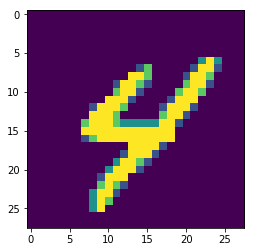

In [20]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(training_epochs):    # 5만개 이미지를 15번 트레이닝 하겠다
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)    # 5만 / 100  => 몇 번 batch 하겠느냐 (500번)
    for i in range(total_batch):    # 500번 (1번에 100개씩 이미지를 읽겠다)
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      cv, _ = sess.run([cost, train], feed_dict={x:batch_xs, y:batch_ys})
      avg_cost += cv / total_batch    # 100 데이터코스트 / 500
      # avg_cost를 왜 저렇게 구하냐,
      # 예: 1, 3, 7, 10, 14의 평균을 구할때 다섯 숫자를 모두 합해서 (35) 개수(5)로 나눠도 되고 (평균 7),
      #     다섯 숫자를 모두 개수로 나눈 후에 (0.2, 0.6, 1.4, 2, 2.8) 다 더해도 된다 (평균 7)
    print("Epoch", "%4d" % (epoch+1), "cost", "{:.9f}".format(avg_cost), "finished")
  print("learning finished")
  print("accuracy : ", sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels}))
  
  r = random.randint(0, mnist.test.num_examples-1)    # 총 mnist.test.num_examples 만큼의 숫자 내에서 랜덤으로 숫자를 하나 뽑기
  print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
  print("Prediction: ", sess.run(tf.argmax(hf, 1), feed_dict={x:mnist.test.images[r:r+1]}))
  plt.imshow(mnist.test.images[r:r+1].reshape(28, 28))
  plt.show()

# 예제

In [0]:
xdata = [[0, 0], [0, 1], [1, 0], [1, 1]]
ydata = [[0], [1], [1], [0]]

In [0]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])
w = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))

hf = tf.sigmoid(tf.matmul(x, w) + b)
cost = -tf.reduce_mean(y * tf.log(hf) + (1 - y) * tf.log(1 - hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

predicted = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), tf.float32))

In [26]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for step in range(10001):
    sess.run(train, feed_dict={x:xdata, y:ydata})
    if step % 100 == 0:
      print(step, sess.run(cost, feed_dict={x:xdata, y:ydata}), sess.run(w))
  hv, pv, av = sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
  print( "hf: %s, pred: %s, acc: %s" % (hv, pv, av))
  print("bias: ", sess.run(b))

0 0.9785518 [[-0.74376154]
 [ 1.6843203 ]]
100 0.7231189 [[-0.70816255]
 [ 0.685557  ]]
200 0.70202875 [[-0.39442056]
 [ 0.36091265]]
300 0.69571745 [[-0.21412095]
 [ 0.19111301]]
400 0.69388497 [[-0.11614563]
 [ 0.10060237]]
500 0.69335866 [[-0.06316155]
 [ 0.05266884]]
600 0.6932078 [[-0.03448342]
 [ 0.02740091]]
700 0.6931647 [[-0.01892041]
 [ 0.01413993]]
800 0.69315225 [[-0.01044404]
 [ 0.00721736]]
900 0.6931486 [[-0.00580642]
 [ 0.00362854]]
1000 0.69314766 [[-0.00325515]
 [ 0.00178512]]
1100 0.69314724 [[-0.00184239]
 [ 0.00085018]]
1200 0.69314724 [[-0.00105403]
 [ 0.00038438]]
1300 0.6931472 [[-0.00061022]
 [ 0.00015818]]
1400 0.6931472 [[-3.5779548e-04]
 [ 5.2690524e-05]]
1500 0.6931472 [[-2.1260284e-04]
 [ 6.6623284e-06]]
1600 0.6931472 [[-1.2805664e-04]
 [-1.0937434e-05]]
1700 0.6931472 [[-7.8179473e-05]
 [-1.5628322e-05]]
1800 0.6931472 [[-4.8354799e-05]
 [-1.4951806e-05]]
1900 0.6931472 [[-3.02722292e-05]
 [-1.24484095e-05]]
2000 0.6931472 [[-1.9166398e-05]
 [-9.6574058e

# 정확도 높이기: Depth를 2개로

In [0]:
xdata = [[0, 0], [0, 1], [1, 0], [1, 1]]
ydata = [[0], [1], [1], [0]]

## XOR을 해결하기 위해 Neural Network로 재구성

In [0]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

w1 = tf.Variable(tf.random_normal([2, 2]))
b1 = tf.Variable(tf.random_normal([2]))
l1 = tf.sigmoid(tf.matmul(x, w1) + b1)

w2 = tf.Variable(tf.random_normal([2, 1]))
b2 = tf.Variable(tf.random_normal([1]))
hf = tf.sigmoid(tf.matmul(l1, w2) + b2)

cost = -tf.reduce_mean(y * tf.log(hf) + (1 - y) * tf.log(1 - hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

predicted = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), tf.float32))

In [42]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for step in range(10001):
    sess.run(train, feed_dict={x:xdata, y:ydata})
    if step % 100 == 0:
      print(step, sess.run(cost, feed_dict={x:xdata, y:ydata}), sess.run(w1), sess.run(w2))
  hv, pv, av = sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
  print( "hf: %s, pred: %s, acc: %s" % (hv, pv, av))
  print("bias: ", sess.run(b1), sess.run(b2))

0 1.0330498 [[-0.6854135  -0.7019598 ]
 [-0.89985347  0.02495403]] [[-1.4696602 ]
 [ 0.46423566]]
100 0.6812661 [[-0.9493269  -0.60871154]
 [-1.1058084   0.11046508]] [[-1.2184837]
 [ 1.0109967]]
200 0.6766389 [[-1.097434   -0.61481124]
 [-1.2102686   0.07950361]] [[-1.3060395]
 [ 1.0333207]]
300 0.67140317 [[-1.2508268 -0.6276943]
 [-1.327003   0.0456092]] [[-1.4226315]
 [ 1.0419672]]
400 0.66496944 [[-1.4123453 -0.6433029]
 [-1.4577357  0.0125604]] [[-1.5606056]
 [ 1.0551506]]
500 0.6571309 [[-1.5820783  -0.66203   ]
 [-1.6016693  -0.02083937]] [[-1.7194215]
 [ 1.074234 ]]
600 0.6476992 [[-1.7600139  -0.68457544]
 [-1.7579725  -0.05599139]] [[-1.8980757]
 [ 1.1004065]]
700 0.6365549 [[-1.9459459  -0.7117848 ]
 [-1.9257034  -0.09437437]] [[-2.094779 ]
 [ 1.1350888]]
800 0.62371373 [[-2.1391985  -0.7445342 ]
 [-2.1035442  -0.13748433]] [[-2.3068206]
 [ 1.1798481]]
900 0.60936874 [[-2.3383636  -0.783541  ]
 [-2.2895238  -0.18671228]] [[-2.5305963]
 [ 1.2362598]]
1000 0.59386486 [[-2.541

* Neural Network의 cost = 0. 0139

# 정확도 높이기: wide하고 deep하게

width를 늘리다 = node 갯수를 늘리다

depth를 늘리다 = 층 수를 늘리다

## wide하게 - node 갯수 늘리기

In [0]:
xdata = [[0, 0], [0, 1], [1, 0], [1, 1]]
ydata = [[0], [1], [1], [0]]

In [0]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

w1 = tf.Variable(tf.random_normal([2, 10]))
b1 = tf.Variable(tf.random_normal([10]))
l1 = tf.sigmoid(tf.matmul(x, w1) + b1)

w2 = tf.Variable(tf.random_normal([10, 1]))
b2 = tf.Variable(tf.random_normal([1]))
hf = tf.sigmoid(tf.matmul(l1, w2) + b2)

cost = -tf.reduce_mean(y * tf.log(hf) + (1 - y) * tf.log(1 - hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

predicted = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), tf.float32))

In [35]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for step in range(10001):
    sess.run(train, feed_dict={x:xdata, y:ydata})
    if step % 100 == 0:
      print(step, "cost: ", sess.run(cost, feed_dict={x:xdata, y:ydata}))
  hv, pv, av = sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
  print( "hf: %s, pred: %s, acc: %s" % (hv, pv, av))

0 cost:  0.6872546
100 cost:  0.66350305
200 cost:  0.645134
300 cost:  0.6261873
400 cost:  0.60613203
500 cost:  0.5848151
600 cost:  0.5621655
700 cost:  0.5380652
800 cost:  0.51230234
900 cost:  0.4846108
1000 cost:  0.4547884
1100 cost:  0.42285156
1200 cost:  0.3891534
1300 cost:  0.3544072
1400 cost:  0.31959754
1500 cost:  0.28580505
1600 cost:  0.25400102
1700 cost:  0.22489175
1800 cost:  0.19885531
1900 cost:  0.17597097
2000 cost:  0.15609916
2100 cost:  0.13897066
2200 cost:  0.124260284
2300 cost:  0.11163582
2400 cost:  0.10078703
2500 cost:  0.09143801
2600 cost:  0.08335153
2700 cost:  0.0763266
2800 cost:  0.070195764
2900 cost:  0.06481966
3000 cost:  0.060082883
3100 cost:  0.055889875
3200 cost:  0.052161306
3300 cost:  0.048831172
3400 cost:  0.045844603
3500 cost:  0.043155365
3600 cost:  0.04072473
3700 cost:  0.03851994
3800 cost:  0.03651321
3900 cost:  0.03468091
4000 cost:  0.03300273
4100 cost:  0.031461317
4200 cost:  0.030041717
4300 cost:  0.028730843
4

* wide nn의 cost = 0.0072

## wide & deep하게 - 층 갯수 늘리기

In [0]:
xdata = [[0, 0], [0, 1], [1, 0], [1, 1]]
ydata = [[0], [1], [1], [0]]

In [0]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

w1 = tf.Variable(tf.random_normal([2, 10]))
b1 = tf.Variable(tf.random_normal([10]))
l1 = tf.sigmoid(tf.matmul(x, w1) + b1)

w2 = tf.Variable(tf.random_normal([10, 10]))
b2 = tf.Variable(tf.random_normal([10]))
l2 = tf.sigmoid(tf.matmul(l1, w2) + b2)

w3 = tf.Variable(tf.random_normal([10, 10]))
b3 = tf.Variable(tf.random_normal([10]))
l3 = tf.sigmoid(tf.matmul(l2, w3) + b3)

w4 = tf.Variable(tf.random_normal([10, 1]))
b4 = tf.Variable(tf.random_normal([1]))
hf = tf.sigmoid(tf.matmul(l3, w4) + b4)

cost = -tf.reduce_mean(y * tf.log(hf) + (1 - y) * tf.log(1 - hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

predicted = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), tf.float32))

In [37]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for step in range(10001):
    sess.run(train, feed_dict={x:xdata, y:ydata})
    if step % 100 == 0:
      print(step, "cost: ", sess.run(cost, feed_dict={x:xdata, y:ydata}))
  hv, pv, av = sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
  print( "hf: %s, pred: %s, acc: %s" % (hv, pv, av))

0 cost:  0.68772376
100 cost:  0.6776393
200 cost:  0.6695861
300 cost:  0.65869224
400 cost:  0.6424215
500 cost:  0.6174947
600 cost:  0.5801457
700 cost:  0.52624303
800 cost:  0.45107836
900 cost:  0.35495073
1000 cost:  0.2557949
1100 cost:  0.17871548
1200 cost:  0.12846273
1300 cost:  0.096536964
1400 cost:  0.07548368
1500 cost:  0.06094732
1600 cost:  0.050491236
1700 cost:  0.04270759
1800 cost:  0.03674557
1900 cost:  0.032068178
2000 cost:  0.02832351
2100 cost:  0.02527313
2200 cost:  0.022750627
2300 cost:  0.020637121
2400 cost:  0.01884577
2500 cost:  0.017311832
2600 cost:  0.015986236
2700 cost:  0.014831312
2800 cost:  0.013817647
2900 cost:  0.012921994
3000 cost:  0.012125779
3100 cost:  0.01141405
3200 cost:  0.010774631
3300 cost:  0.010197492
3400 cost:  0.009674338
3500 cost:  0.009198163
3600 cost:  0.008763231
3700 cost:  0.008364588
3800 cost:  0.007998091
3900 cost:  0.0076600686
4000 cost:  0.0073474734
4100 cost:  0.0070576407
4200 cost:  0.006788314
4300

* wide & deep nn의 cost = 0.0019

## 무작정 width와 depth를 늘린다고 능사는 아니다 - 오히려 cost가 오를 수도 있음 (vanishing gradient)

In [0]:
xdata = [[0, 0], [0, 1], [1, 0], [1, 1]]
ydata = [[0], [1], [1], [0]]

In [0]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

w1 = tf.Variable(tf.random_normal([2, 10]))
b1 = tf.Variable(tf.random_normal([10]))
l1 = tf.sigmoid(tf.matmul(x, w1) + b1)

w2 = tf.Variable(tf.random_normal([10, 10]))
b2 = tf.Variable(tf.random_normal([10]))
l2 = tf.sigmoid(tf.matmul(l1, w2) + b2)

w3 = tf.Variable(tf.random_normal([10, 10]))
b3 = tf.Variable(tf.random_normal([10]))
l3 = tf.sigmoid(tf.matmul(l2, w3) + b3)

w4 = tf.Variable(tf.random_normal([10, 10]))
b4 = tf.Variable(tf.random_normal([10]))
l4 = tf.sigmoid(tf.matmul(l3, w4) + b4)

w5 = tf.Variable(tf.random_normal([10, 10]))
b5 = tf.Variable(tf.random_normal([10]))
l5 = tf.sigmoid(tf.matmul(l4, w5) + b5)

w6 = tf.Variable(tf.random_normal([10, 10]))
b6 = tf.Variable(tf.random_normal([10]))
l6 = tf.sigmoid(tf.matmul(l5, w6) + b6)

w7 = tf.Variable(tf.random_normal([10, 10]))
b7 = tf.Variable(tf.random_normal([10]))
l7 = tf.sigmoid(tf.matmul(l6, w7) + b7)

w8 = tf.Variable(tf.random_normal([10, 10]))
b8 = tf.Variable(tf.random_normal([10]))
l8 = tf.sigmoid(tf.matmul(l7, w8) + b8)

w9 = tf.Variable(tf.random_normal([10, 10]))
b9 = tf.Variable(tf.random_normal([10]))
l9 = tf.sigmoid(tf.matmul(l8, w9) + b9)

w10 = tf.Variable(tf.random_normal([10, 1]))
b10 = tf.Variable(tf.random_normal([1]))
hf = tf.sigmoid(tf.matmul(l9, w10) + b10)

cost = -tf.reduce_mean(y * tf.log(hf) + (1 - y) * tf.log(1 - hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

predicted = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), tf.float32))

In [40]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for step in range(10001):
    sess.run(train, feed_dict={x:xdata, y:ydata})
    if step % 100 == 0:
      print(step, "cost: ", sess.run(cost, feed_dict={x:xdata, y:ydata}))
  hv, pv, av = sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
  print( "hf: %s, pred: %s, acc: %s" % (hv, pv, av))

0 cost:  0.76889396
100 cost:  0.6931021
200 cost:  0.6930972
300 cost:  0.69309217
400 cost:  0.6930871
500 cost:  0.6930821
600 cost:  0.693077
700 cost:  0.69307196
800 cost:  0.6930667
900 cost:  0.6930615
1000 cost:  0.69305617
1100 cost:  0.69305086
1200 cost:  0.69304544
1300 cost:  0.6930399
1400 cost:  0.6930343
1500 cost:  0.69302857
1600 cost:  0.6930227
1700 cost:  0.69301677
1800 cost:  0.6930107
1900 cost:  0.6930044
2000 cost:  0.69299805
2100 cost:  0.69299155
2200 cost:  0.69298476
2300 cost:  0.69297796
2400 cost:  0.69297093
2500 cost:  0.69296354
2600 cost:  0.69295615
2700 cost:  0.69294834
2800 cost:  0.6929404
2900 cost:  0.6929322
3000 cost:  0.69292367
3100 cost:  0.69291484
3200 cost:  0.6929057
3300 cost:  0.6928963
3400 cost:  0.6928865
3500 cost:  0.6928763
3600 cost:  0.6928657
3700 cost:  0.69285464
3800 cost:  0.6928431
3900 cost:  0.69283104
4000 cost:  0.6928184
4100 cost:  0.6928053
4200 cost:  0.6927916
4300 cost:  0.6927772
4400 cost:  0.6927622
450